In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
infol = '/Users/irffanalahi/Research/Research_update/in-silico/Rdresult/corrmNeuallrange/v4_1000000/5g/try1'
infiles = os.listdir(infol)

if '.ipynb_checkpoints' in infiles:
    infiles.remove('.ipynb_checkpoints')
    
if '.DS_Store' in infiles:
    infiles.remove('.DS_Store')

num_groups = 3

cell = 'mNeu'
cell_real = 'mNeu_real'
infiles

['DMR5.txt_result_nocov_mincpg6_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'DMR20.txt_result_nocov_mincpg5_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'DMR20.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg5_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'DMR20.txt_result_nocov_mincpg6_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg6_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt',
 'DMR5.txt_result_nocov_mincpg5_ABSreadcount_divisioned.txt_CSxOut.txt_mixture_output_1000000.txt']

In [3]:
def merge(list1, list2):
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

def Sort_Tuple(tup): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    tup.sort(key = lambda x: x[1]) 
    return tup 

In [4]:
def generate_lists(df, cell_name, cell_name_real):
    num = 0
    avg_vals_real = []
    avg_vals = []
    avg_lst_real = np.zeros(num_groups)
    avg_lst = np.zeros(num_groups)

    mNeu_arr = np.array(df[cell_name])
    mNeu_arr_real = np.array(df[cell_name_real])
    for i in range(len(df)):
        if num == num_groups:
            avg_vals.append(np.mean(avg_lst))
            avg_vals_real.append(np.mean(avg_lst_real))
            avg_lst_real = np.zeros(num_groups)
            avg_lst = np.zeros(num_groups)
            num = 0
        avg_lst[num] = mNeu_arr[i]
        avg_lst_real[num] = mNeu_arr_real[i]
        num += 1
    
    avg_vals.append(np.mean(avg_lst))
    avg_vals_real.append(np.mean(avg_lst_real))
    
    
    
    
   
    #######irf###########
    merdeglist=merge(avg_vals,avg_vals_real)
    
    merdeglist=Sort_Tuple(merdeglist)
    
    first_tuple_elements = [a_tuple[0] for a_tuple in merdeglist]
    
    second_tuple_elements = [a_tuple[1] for a_tuple in merdeglist]

    return first_tuple_elements,second_tuple_elements #sorted(avg_vals), sorted(avg_vals_real) ###

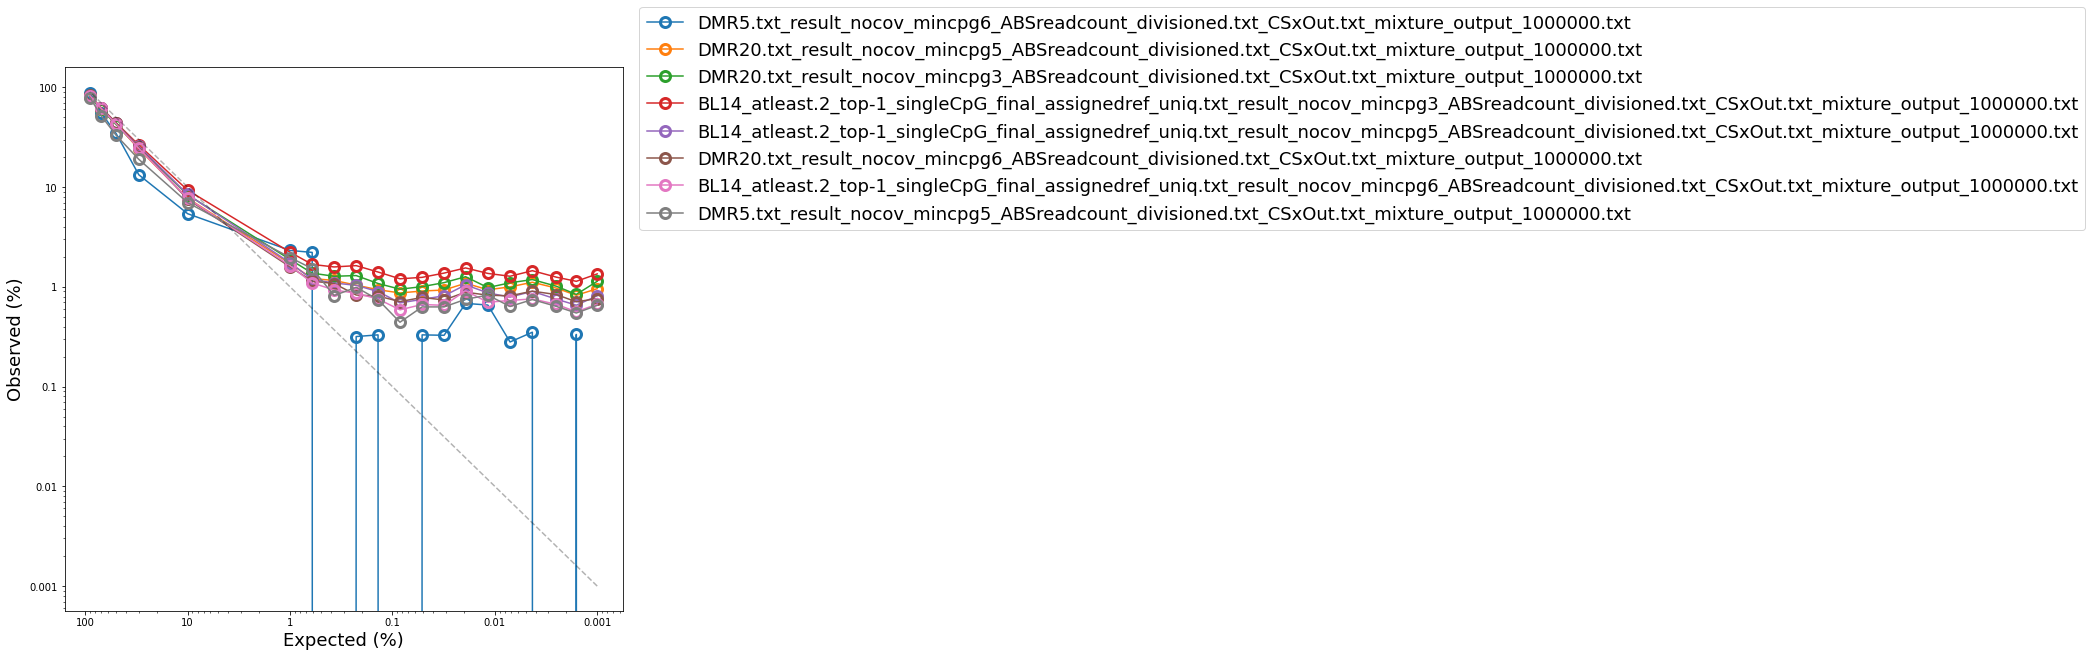

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

for file_name in infiles:
    file = infol + '/' + file_name
    data = pd.read_csv(file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    
    df['Index Number'] = [int(i.split('insilmix')[-1]) for i in df.index]

    df.sort_values(['Index Number'], inplace=True)
    df = df.drop('Index Number', axis=1)
    
    for col in df.columns:
        if 'real' not in col:
            df[col] = np.array(df[col]) * 100
            
    y, x = generate_lists(df, cell, cell_real)
    ax.plot(np.array(x), y, label=file_name, marker='o', mew=3, ms=10, fillstyle='none')

ax.plot(x, x, alpha=0.3, ls='--', c='k')
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Expected (%)', fontsize=18)
ax.set_ylabel('Observed (%)', fontsize=18)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.legend(loc=(1.03, 0.7), fontsize=18)

In [6]:
fig.savefig(infol+'plot_g.pdf',dpi=300, bbox_inches='tight')